In [52]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from io import StringIO
import folium # pip install folium
from folium import plugins
import ipywidgets
import geocoder # pip install geocoder
import geopy # pip install geopy
from folium.plugins import HeatMap

In [3]:
# load dataset of the linkedin job offers found with the datascrapper

df_datos = pd.read_csv("linkedin_datos.csv",sep="|", index_col=[0])


In [5]:
# Quick overview of data set
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4578 entries, 0 to 4577
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            4578 non-null   object
 1   country       4578 non-null   object
 2   searchterm    4578 non-null   object
 3   job_title     4578 non-null   object
 4   company       4578 non-null   object
 5   job_location  4578 non-null   object
 6   time          4578 non-null   object
 7   applicants    4578 non-null   object
 8   workplace     4578 non-null   object
 9   working_time  4578 non-null   object
 10  job_level     4578 non-null   object
 11  company_size  4578 non-null   object
 12  industry      4578 non-null   object
 13  job_details   4578 non-null   object
 14  job_url       4578 non-null   object
 15  timestamp     4578 non-null   object
dtypes: object(16)
memory usage: 608.0+ KB


In [6]:
# show first and last lines
df_datos.head()


,id,country,searchterm,job_title,company,job_location,time,applicants,workplace,working_time,job_level,company_size,industry,job_details,job_url,timestamp
0,4,Spain,data scientist,BUSINESS DATA SCIENTIST,Iberdrola Renewables,"Madrid, Community of Madrid, Spain",10 hours ago,6 applicants,,Full-time,Entry level,"10,001+ employees",Electric Power Generation,\n Compañía\n\nI-DE REDES ELE INTE S....,https://www.linkedin.com/jobs/view/3185669905,2022-07-24 04:15:25.829050
1,5,Spain,data scientist,Data Scientist Intern – Advanced Analytics (No...,Verisure,"Pozuelo de Alarcón, Community of Madrid, Spain",1 day ago,47 applicants,Hybrid,Full-time,Entry level,"10,001+ employees",Consumer Services,\n Data Scientist Intern – Advanced A...,https://www.linkedin.com/jobs/view/3180190407,2022-07-24 04:15:40.976658
2,6,Spain,data scientist,Data Scientist (Andorra),Gauss & Neumann,"Barcelona, Catalonia, Spain",2 weeks ago,,Hybrid,Full-time,Entry level,11-50 employees,Consumer Services,"\n At Gauss & Neumann, we are looking...",https://www.linkedin.com/jobs/view/3155817551,2022-07-24 04:15:50.007419
3,7,Spain,data scientist,Data Scientist,"GDS MODELLICA, S.L.","Madrid, Community of Madrid, Spain",1 day ago,30 applicants,On-site,Full-time,Entry level,51-200 employees,Consumer Services,"\n GDS Modellica, S.L. (GDS) is a lea...",https://www.linkedin.com/jobs/view/3180512717,2022-07-24 04:16:01.414524
4,8,Spain,data scientist,Health Insights Data Scientist / Analytic Prog...,IQVIA,"Madrid, Community of Madrid, Spain",8 hours ago,1 applicant,,Full-time,Entry level,"10,001+ employees",Hospitals and Health Care,\n Health Insights Data Scientist / A...,https://www.linkedin.com/jobs/view/3185753085,2022-07-24 04:16:10.636739


In [7]:
# show last lines
df_datos.tail()


,id,country,searchterm,job_title,company,job_location,time,applicants,workplace,working_time,job_level,company_size,industry,job_details,job_url,timestamp
4573,249,Italy,data scientist,ML Engineering Senior,NTT DATA Italia,"Bari, Apulia, Italy",2 weeks ago,9 applicants,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,"\n \n\nNTT DATA, Trusted Global Innov...",https://www.linkedin.com/jobs/view/3056054170,2022-07-24 20:59:03.747600
4574,250,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Turin, Piedmont, Italy",2 weeks ago,2 applicants,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125752576,2022-07-24 20:59:36.340836
4575,251,Italy,data scientist,Digital Marketing Strategist,H FARM S.p.A,"Milan, Lombardy, Italy",3 days ago,21 applicants,On-site,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n CHI SIAMO\n\nH-FARM è una piattaf...,https://www.linkedin.com/jobs/view/3179842872,2022-07-24 20:59:49.267504
4576,252,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Rome, Latium, Italy",2 weeks ago,,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125755152,2022-07-24 21:00:05.067934
4577,253,Italy,data scientist,Senior Data Architect,Dedagroup,"Rome, Latium, Italy",1 month ago,1 applicant,On-site,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n Cosa aspettarti dalla posizione: \...,https://www.linkedin.com/jobs/view/3167669900,2022-07-24 21:00:24.007882


In [8]:
# showing tatistical summary for numerical! columns present in the dataset. This method calculates some statistical measures like percentile, mean and standard deviation of the numerical values!
df_datos.describe()

# We observe that there are some numerical data, time and applicants but mixed with text, the other datas are categorical/ nominal data

,id,country,searchterm,job_title,company,job_location,time,applicants,workplace,working_time,job_level,company_size,industry,job_details,job_url,timestamp
count,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
unique,984,10,3,2017,1775,625,49,187,5,89,22,21,115,3442,4330,4578
top,4,United Kingdom,data scientist,Data Scientist,Jefferson Frank,"London, England, United Kingdom",1 week ago,,On-site,Full-time,Entry level,"10,001+ employees",IT Services and IT Consulting,\n Mid/Senior Python Developer (Fulls...,https://www.linkedin.com/jobs/view/3177223537,2022-07-24 04:15:25.829050
freq,18,1141,2846,583,83,592,897,1199,1826,4197,1901,992,1120,38,8,1


In [9]:
# shows the numbers of rows and columns
df_datos.shape

(4578, 16)

In [28]:
# we start cleaning the column applicant of words and string
df_datos["applicants"] = df_datos["applicants"].apply(lambda x: x.replace("applicants",""))
df_datos["applicants"] = df_datos["applicants"].apply(lambda x: x.replace("applicant",""))
df_datos["applicants"] = df_datos["applicants"].apply(lambda x: x.replace("","").strip())




In [29]:
# now we convert the number of applicants still in string format in integer numbers
df_datos["applicants"]

def convert_int (x):
    if x == "":
        valor = 0
    else:
        valor = int(x)

    return valor


df_datos["applicants"] = df_datos["applicants"].apply(convert_int)



In [30]:
# how does the column look like now?
df_datos["applicants"]



0        6
1       47
2        0
3       30
4        1
        ..
4573     9
4574     2
4575    21
4576     0
4577     1
Name: applicants, Length: 4578, dtype: int64

In [31]:
# Let's see the info of the column after the operations
df_datos["applicants"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4578 entries, 0 to 4577
Series name: applicants
Non-Null Count  Dtype
--------------  -----
4578 non-null   int64
dtypes: int64(1)
memory usage: 200.6 KB


In [32]:
# Now we see what kind of time data we have in order to see how we convert
df_datos["time"].unique()

array(['10 hours ago', '1 day ago', '2 weeks ago', '8 hours ago',
       '5 days ago', '17 hours ago', '11 hours ago', '1 week ago',
       '2 months ago', '3 days ago', '4 days ago', '1 month ago',
       '2 days ago', '20 hours ago', '3 weeks ago', '4 months ago',
       '14 hours ago', '15 hours ago', '4 weeks ago', '3 months ago',
       '5 months ago', 'time', '12 hours ago', '9 hours ago',
       '19 hours ago', '21 hours ago', ' ', '18 hours ago', '6 days ago',
       '4 hours ago', '1 hour ago', '2 hours ago', '3 hours ago',
       '7 months ago', '8 months ago', '5 hours ago', '1 year ago',
       '9 months ago', '6 months ago', '6 hours ago', '22 hours ago',
       '27 minutes ago', '36 minutes ago', '25 minutes ago',
       '23 hours ago', '16 hours ago', '13 hours ago', '7 hours ago',
       '41 minutes ago'], dtype=object)

In [33]:
# first we replace the word ago
df_datos["time"] = df_datos["time"].apply(lambda x: x.replace("ago",""))

In [34]:

# We convert the time into days
def time_convert (x):
   """ function to change the time format into days 
   When the format is hours it is considered 1 day
   """

   try:
        spliter = x.split(" ")
       # print (spliter)
        if spliter[1] == "weeks" or spliter[1] == "week":
                valor = int(spliter[0])*7
        elif spliter[1] == "months" or spliter[1] == "month":
                valor = int(spliter[0])*30

        elif spliter[1] == "hours" or spliter[1] == "hour":
                valor = 1

        elif spliter[1] == "days" or spliter[1] == "day":
                valor = int(spliter[0])

        else:
                valor = 0

        return valor

   except:
        return 0


# we apply the function to the column
df_datos["time"] = df_datos["time"].apply(time_convert)


In [24]:
# lets see how the time is converted
df_datos["time"].head()

0     1
1     1
2    14
3     1
4     1
Name: time, dtype: int64

In [48]:
# now we check if the datatype changed
df_datos["time"].info()

<class 'pandas.core.series.Series'>
Int64Index: 4578 entries, 0 to 4577
Series name: time
Non-Null Count  Dtype
--------------  -----
4578 non-null   int64
dtypes: int64(1)
memory usage: 200.6 KB


In [35]:
# we delete some empty jobs
masks = (df_datos["time"] == 0) & (df_datos["job_title"] == ' ')

df_datos.drop(df_datos.index[masks],inplace=True,axis=0)

df_datos

,id,country,searchterm,job_title,company,job_location,time,applicants,workplace,working_time,job_level,company_size,industry,job_details,job_url,timestamp
0,4,Spain,data scientist,BUSINESS DATA SCIENTIST,Iberdrola Renewables,"Madrid, Community of Madrid, Spain",1,6,,Full-time,Entry level,"10,001+ employees",Electric Power Generation,\n Compañía\n\nI-DE REDES ELE INTE S....,https://www.linkedin.com/jobs/view/3185669905,2022-07-24 04:15:25.829050
1,5,Spain,data scientist,Data Scientist Intern – Advanced Analytics (No...,Verisure,"Pozuelo de Alarcón, Community of Madrid, Spain",1,47,Hybrid,Full-time,Entry level,"10,001+ employees",Consumer Services,\n Data Scientist Intern – Advanced A...,https://www.linkedin.com/jobs/view/3180190407,2022-07-24 04:15:40.976658
2,6,Spain,data scientist,Data Scientist (Andorra),Gauss & Neumann,"Barcelona, Catalonia, Spain",14,0,Hybrid,Full-time,Entry level,11-50 employees,Consumer Services,"\n At Gauss & Neumann, we are looking...",https://www.linkedin.com/jobs/view/3155817551,2022-07-24 04:15:50.007419
3,7,Spain,data scientist,Data Scientist,"GDS MODELLICA, S.L.","Madrid, Community of Madrid, Spain",1,30,On-site,Full-time,Entry level,51-200 employees,Consumer Services,"\n GDS Modellica, S.L. (GDS) is a lea...",https://www.linkedin.com/jobs/view/3180512717,2022-07-24 04:16:01.414524
4,8,Spain,data scientist,Health Insights Data Scientist / Analytic Prog...,IQVIA,"Madrid, Community of Madrid, Spain",1,1,,Full-time,Entry level,"10,001+ employees",Hospitals and Health Care,\n Health Insights Data Scientist / A...,https://www.linkedin.com/jobs/view/3185753085,2022-07-24 04:16:10.636739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,249,Italy,data scientist,ML Engineering Senior,NTT DATA Italia,"Bari, Apulia, Italy",14,9,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,"\n \n\nNTT DATA, Trusted Global Innov...",https://www.linkedin.com/jobs/view/3056054170,2022-07-24 20:59:03.747600
4574,250,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Turin, Piedmont, Italy",14,2,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125752576,2022-07-24 20:59:36.340836
4575,251,Italy,data scientist,Digital Marketing Strategist,H FARM S.p.A,"Milan, Lombardy, Italy",3,21,On-site,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n CHI SIAMO\n\nH-FARM è una piattaf...,https://www.linkedin.com/jobs/view/3179842872,2022-07-24 20:59:49.267504
4576,252,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Rome, Latium, Italy",14,0,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125755152,2022-07-24 21:00:05.067934


In [69]:
df_datos.drop(df_datos.index[181], inplace=True)

<AxesSubplot:>

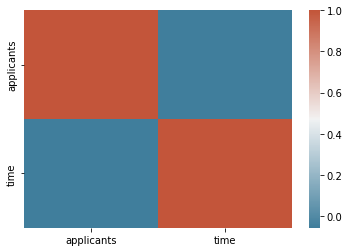

In [91]:
#  find the pairwise correlation of numerical values in order to see where to investigate more
corr =df_datos[["applicants","time"]].corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
#mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap=cmap)


<AxesSubplot:xlabel='time', ylabel='applicants'>

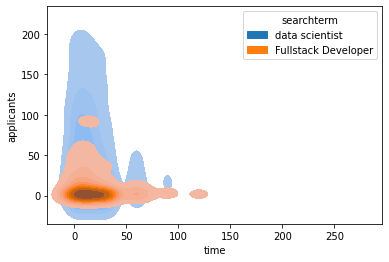

In [82]:
#sns.kdeplot(data=df_datos, x="applicants", hue="searchterm", multiple="stack")
#multiple="stack"
sns.kdeplot(data=df_datos, x="time", y="applicants",hue="searchterm" , fill=True)

In [67]:
# There is a slight negative correlation, if the add is older there are less applicants
# due to quick selection processes?
print("min time, min",df_datos["time"].min())
print("max time",df_datos["time"].max())
print("median time",df_datos["time"].median())

min time 0
max time 270
median time 14.0


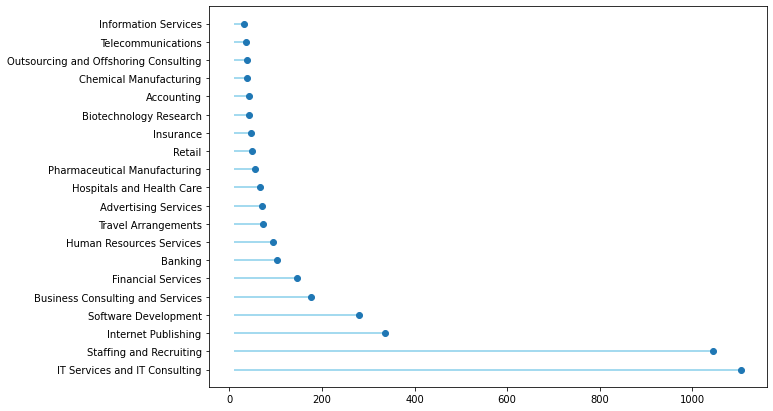

In [100]:
# Looking on how many offers are there by industry
conteo = df_datos["industry"].value_counts(ascending=False)
conteo = conteo[:20]

plt.figure(figsize=(10,7))
plt.hlines(y=conteo.index,
           xmin=10,
           xmax=conteo,
           color='skyblue')
plt.plot(conteo, conteo.index, "o")

In [ ]:
#sns.countplot(y ='job_title', data = ds_spain, order=ds_spain["job_title"].value_counts().iloc[:10].index)

<AxesSubplot:xlabel='time', ylabel='applicants'>

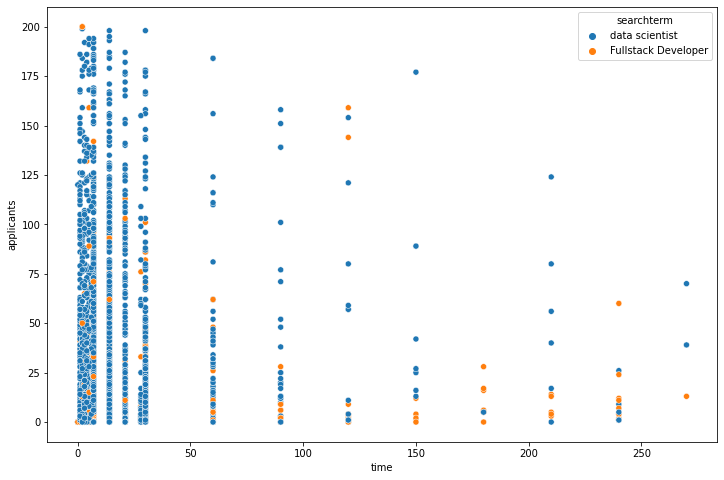

In [113]:
# Which offers in function of time do have more applicants. Do applicants apply to older offers?

plt.figure(figsize=(12,8))
sns.scatterplot(x=df_datos["time"],
                y=df_datos["applicants"],
                hue = df_datos["searchterm"],
               )

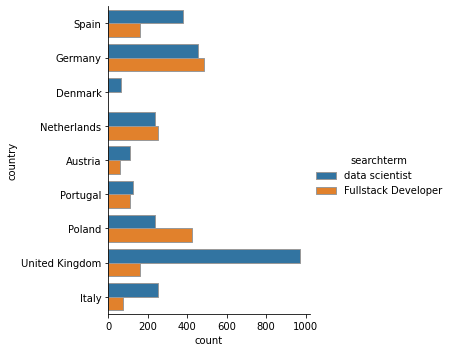

In [118]:
# Show number of offers by job searchterm and grouped by country
sns.catplot(y="country",
            hue="searchterm",
            kind="count",
            edgecolor=".6",
           
            orient = "H",
            data=df_datos)

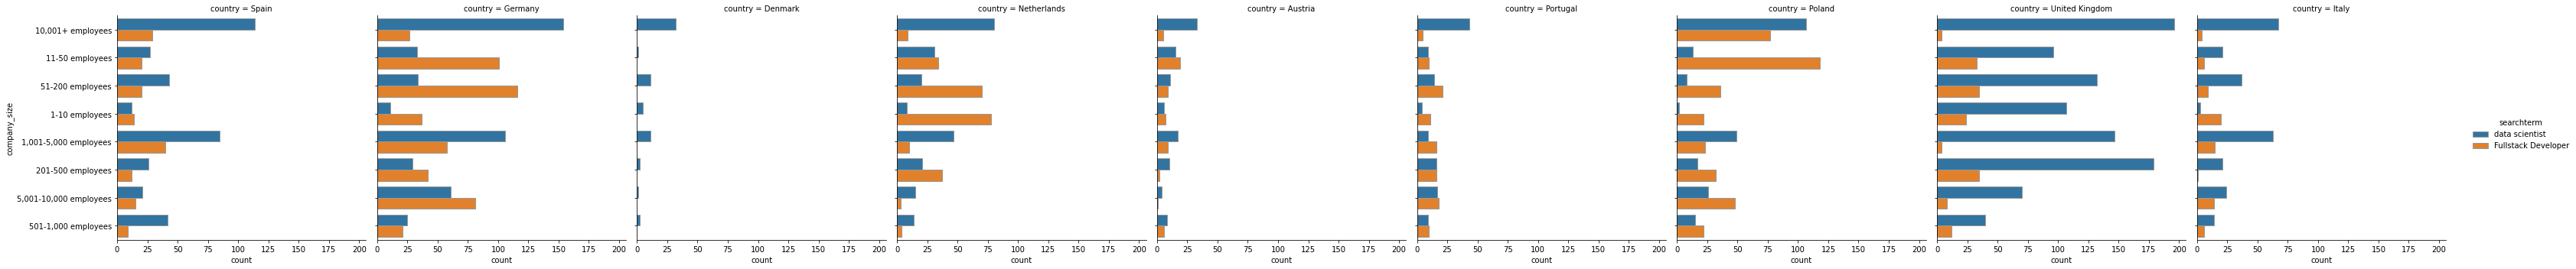

In [127]:
sns.catplot(y="company_size",
            hue="searchterm",
            kind="count",
            edgecolor=".6",
            col="country",
            orient = "H",
            data=df_datos)

In [126]:

# Cleaning an error of importing
df_datos["company_size"].unique()
mask1 = df_datos["company_size"].isin(['IT Services and IT Consulting',
'Actively recruiting','3 school alumni','Robert Mayer is hiring for this job',
'IT Services and IT Consulting','Wilhelm Schoening is hiring for this job',
 'You have a preferred skill badge', 'Software Development','Farming', 'Florian Lagler, MD PhD is hiring for this job',
 'Staffing and Recruiting', '2 school alumni','Your profile matches this job'])
df_datos.drop(df_datos[mask1].index, inplace=True)


array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'applicants'}>]], dtype=object)

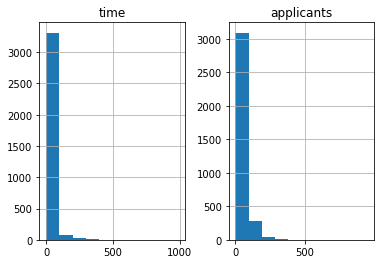

In [144]:
# Which are the companies that are searching for more people
companies = df_datos[["country","company","industry","time","applicants","job_title","company_size","searchterm"]][["company"]].value_counts()
companies.sort_values(ascending=False)[0:50]

companies = df_datos.groupby(by=["company","job_title","country","industry","company_size","searchterm"]).sum()
companies.hist()


In [145]:
companies.reset_index(inplace=True)

In [146]:
companies

,company,job_title,country,industry,company_size,searchterm,time,applicants
0,.NET Professionals,.NET developer gezondheidszorg Herten,Germany,Staffing and Recruiting,1-10 employees,Fullstack Developer,21,2
1,.NET Professionals,Fullstack .NET developer staalindustrie,Netherlands,Staffing and Recruiting,1-10 employees,Fullstack Developer,30,0
2,.NET Professionals,Fullstack developer maatschappelijk betrokken ...,Netherlands,Staffing and Recruiting,1-10 employees,Fullstack Developer,30,0
3,.NET Professionals,Senior fullstack .NET developer bouw & vrijeti...,Netherlands,Staffing and Recruiting,1-10 employees,Fullstack Developer,30,1
4,1000Farmacie,Data Scientist,Italy,Software Development,11-50 employees,data scientist,14,151
...,...,...,...,...,...,...,...,...
3431,ÖBB,(Senior) .NET Fullstack Developer:in Vollzeit/...,Austria,Truck Transportation,"10,001+ employees",Fullstack Developer,28,0
3432,ÖBB,Erfahrene:r .NET Fullstack Developer:in,Austria,Truck Transportation,"10,001+ employees",Fullstack Developer,30,0
3433,ÖBB,Expert:in Data Scientist im ÖBB Lösungscenter ...,Austria,Truck Transportation,"10,001+ employees",data scientist,30,0
3434,ÖBB,Leiter:in Datenmanagement,Austria,Truck Transportation,"10,001+ employees",data scientist,21,0


/home/christian/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Germany'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'Italy'),
  Text(3, 0, 'United Kingdom'),
  Text(4, 0, 'Poland'),
  Text(5, 0, 'Portugal'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Austria'),
  Text(8, 0, 'Denmark')])

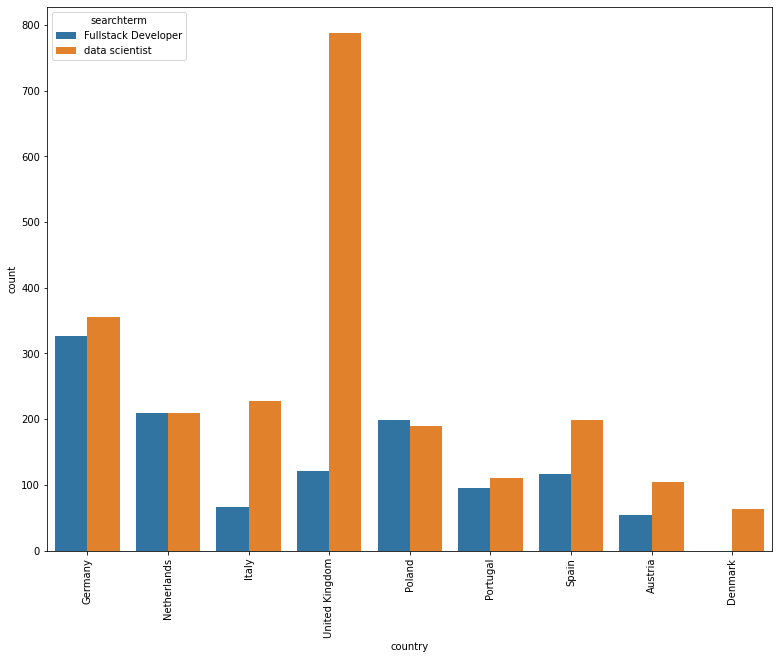

In [149]:
# Job offers by country

plt.figure(figsize=(13,10))
#sns.barplot(x = companies["company_size"].values, y = companies["job_title"].value_counts(), data = companies)
sns.countplot(companies["country"],hue="searchterm",data=companies)
plt.xticks(rotation=90)
# z = companies["job_title"].value_counts()
# sns.barplot(x = 'country', y = companies["country"].count(), data = companies)
# Show the plot
#plt.show()

<AxesSubplot:>

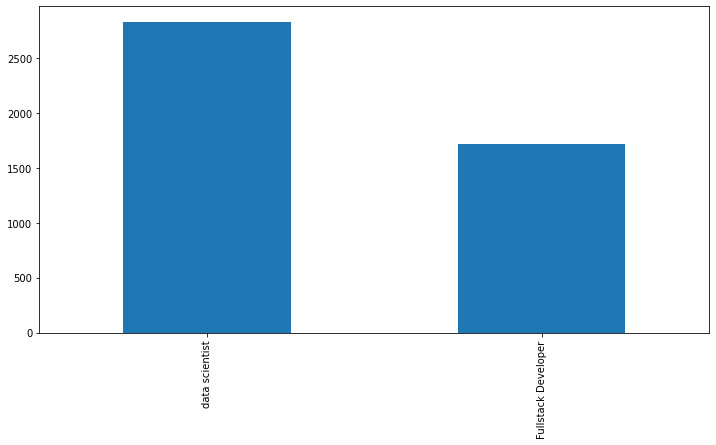

In [175]:
# Job offers by searchterm
fig, ax = plt.subplots(figsize=(12, 6))

#sns.countplot(companies["industry"],hue="searchterm",data=companies)
#sns.barplot(data=companies, x="country", y="applicants",hue="searchterm", ax=ax)
#sns.barplot(data=companies, x="country", y=r,hue="searchterm", ax=ax)
df_datos["searchterm"].value_counts().plot(kind='bar')


<AxesSubplot:xlabel='country', ylabel='applicants'>

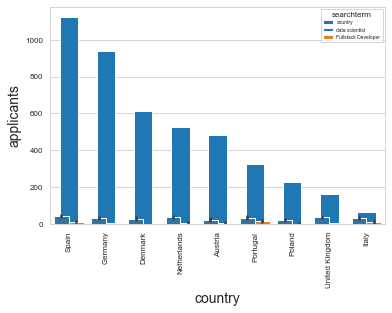

In [151]:
df_datos["country"].value_counts().plot(kind='bar')
sns.barplot(x="country",y="applicants",hue="searchterm", data=df_datos)

puesto  applicants  applicant/job
country        searchterm                                            
Austria        Fullstack Developer      58         482       8.310345
               data scientist          109        2680      24.587156
Denmark        data scientist           65        1898      29.200000
Germany        Fullstack Developer     486        3314       6.818930
               data scientist          455       15551      34.178022
Italy          Fullstack Developer      75         819      10.920000
               data scientist          253        7872      31.114625
Netherlands    Fullstack Developer     253        1742       6.885375
               data scientist          237        9431      39.793249
Poland         Fullstack Developer     423        1105       2.612293
               data scientist          238        5322      22.361345
Portugal       Fullstack Developer     107        1614      15.084112
               data scientist          122        4056      33.245902
Spain          Fullstack Developer     159        2206      13.874214
               data scientist          376       17188      45.712766
United Kingdom Fullstack Developer     158        1060       6.708861
               data scientist          972       35431      36.451646

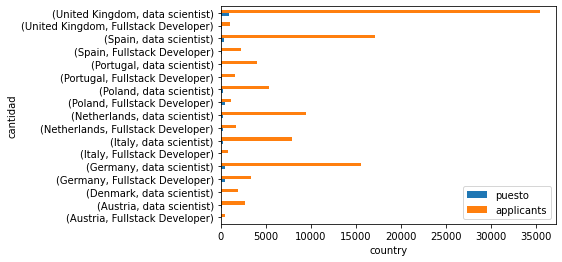

In [70]:
# Showing ratio applicant / job per country
# Table in pivot Form with country, job applicants per job 

df_datos["puesto"] = 1
country_offer = df_datos.groupby(by=["country","searchterm"])["puesto"].sum()
country_applicants = df_datos.groupby(by=["country","searchterm"])["applicants"].sum()
#sns.barplot(x="country",y=["country_offer","country_applicants"])
#df_datos.plot.bar(x = 'country', y = ['puesto', 'applicants'], rot = 40, ax = ax)
nw_df = pd.concat([country_offer,country_applicants], axis=1)
#nw_df.reset_index(inplace=True)

ax = nw_df.plot(kind="barh", xlabel="country")
ax.set_xlabel("country")
ax.set_ylabel("cantidad")

nw_df["applicant/job"] =  nw_df["applicants"]/nw_df["puesto"]
nw_df



<AxesSubplot:ylabel='country,searchterm'>

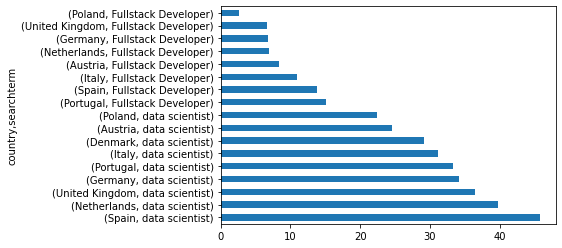

In [72]:
nw_df["applicant/job"] ## ratio how many people apply per job

nw_df["applicant/job"].sort_values(ascending=False).plot(kind="barh")

# we see that in Spain there are more applicants per job and in Poland less

In [73]:
# which are the different industries

industry = df_datos["industry"].value_counts()


<Figure size 1080x1080 with 0 Axes>

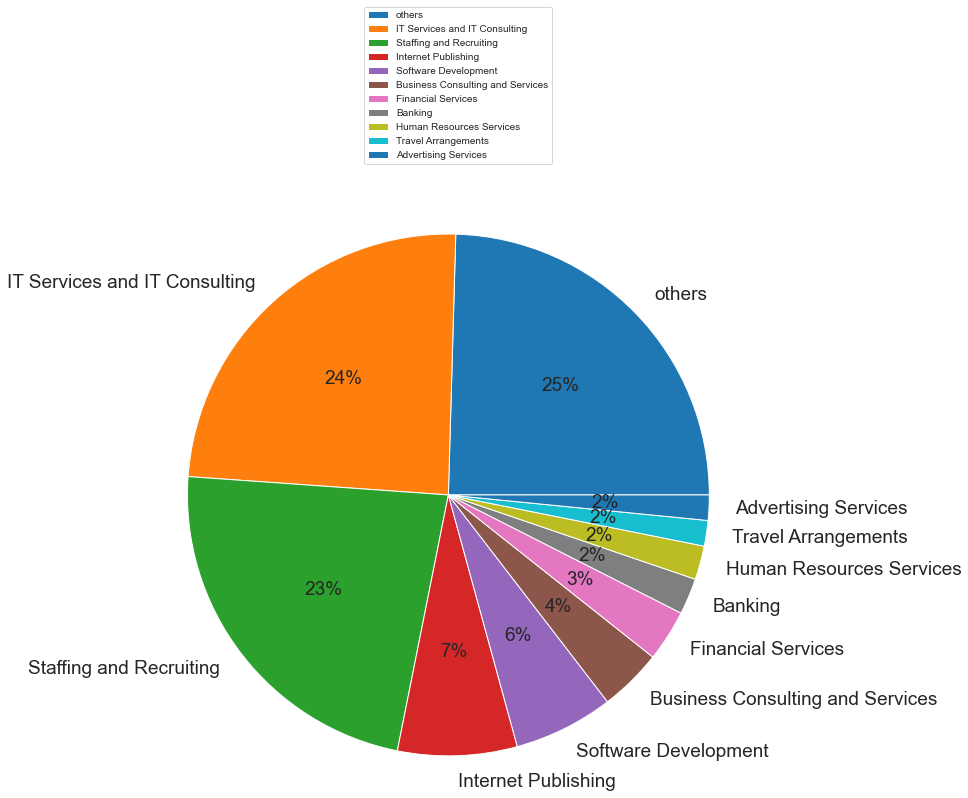

In [136]:
industry.sort_values(ascending=False)

## we only copy the 10 highest values
df2 = pd.DataFrame(industry[:10].copy())

# now we create a dataframe for the other industries
other = pd.DataFrame(data={"industry":['others'],"offers":[industry[10:].copy().sum()]})
other.reset_index(drop=True, inplace=True)

# we fix the index and column name
df2["industry2"] = df2.index
df2.reset_index(drop=True, inplace=True)
df2.rename(columns = {'industry':'offers',"industry2":'industry'},inplace=True)
column=['industry','offers']
  
# create the new index for columns
df2 = df2.reindex(column, axis='columns')

# we concat the dfs
df3 = pd.concat([other,df2],ignore_index=True)
plt.figure(figsize=(15, 15))
ax = df3.plot(kind = 'pie',radius=3, y = 'offers', fontsize=19, labels = df3['industry'],  autopct='%.0f%%',shadow=False,legend=True, ylabel='',title="")
ax.legend(bbox_to_anchor=(1, 2.00), loc='lower right')
ax.set_facecolor('white')
plt.show()
df3["percentage"] = [x/sum(df3["offers"])*100 for x in df3["offers"]]


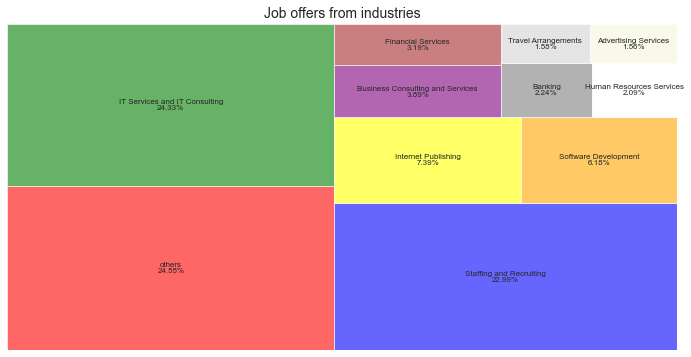

In [139]:
# Tree Map of the industries 

#sns.set_style("darkgrid") # set seaborn plot style
sns.set_style("whitegrid")
sizes= df3["offers"].values# proportions of the categories
label=df3["industry"]
colores = sns.color_palette("Spectral", as_cmap=True)
SMALL_SIZE = 5
MEDIUM_SIZE = 8
BIGGER_SIZE = 14

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title
plt.figure(figsize=(12, 6))
ax = squarify.plot(sizes=sizes, label=label, alpha=0.6,text_kwargs={'wrap':True}, color=["red","green","blue", "yellow","orange","purple","brown","grey","white","lightgrey","beige"],value=[f'{x:.2f}%' for x in df3["percentage"]]).set(title='Job offers from industries')
plt.axis('off')



plt.show()

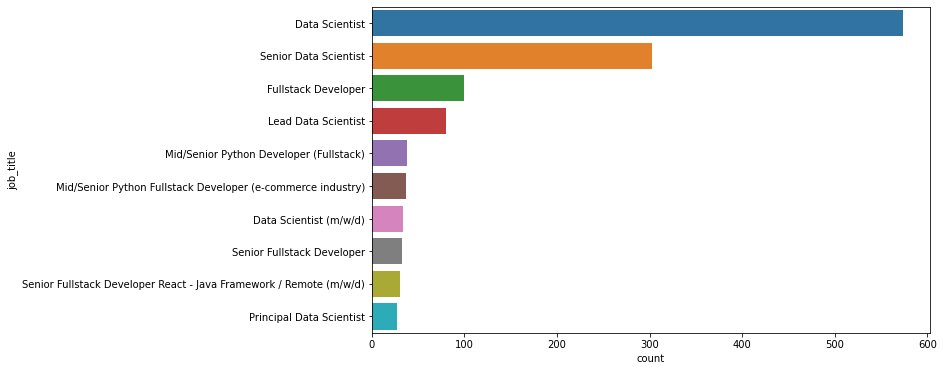

In [134]:
# Showing 10 most frequent job titles

#dsc = df_datos[df_datos["job_title"].value_counts()[:10]]
plt.figure(figsize=(10,6))
chart = sns.countplot(y ='job_title', data = df_datos, order=df_datos["job_title"].value_counts().iloc[:10].index)
 
# Show the plot


plt.show()

array([[<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'applicants'}>],
       [<AxesSubplot:title={'center':'puesto'}>, <AxesSubplot:>]],
      dtype=object)

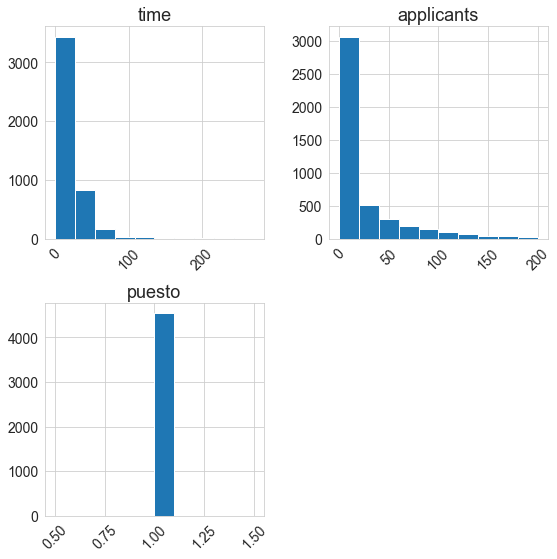

In [324]:
df_datos.hist(figsize=(9,9),xrot=45)

/home/christian/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/christian/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/christian/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/christian/.local/lib/python3.10/site-packages/seaborn/categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/christian/.local/lib/python3.10/site-packages/seaborn/categorica

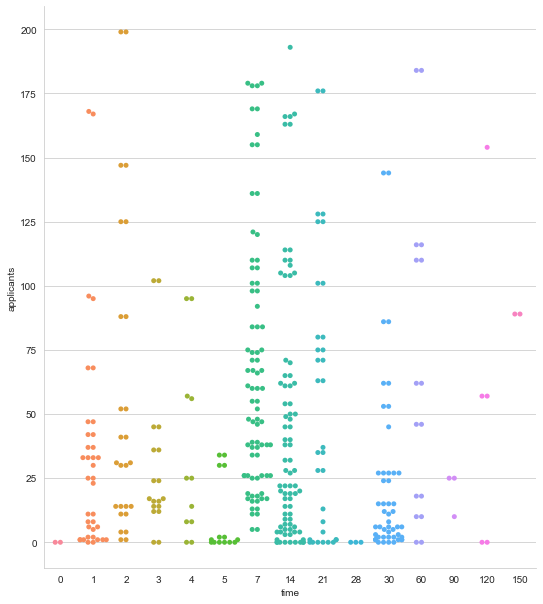

In [305]:
# Showing applicants in function of time as a swarm plot
sns.catplot(x="time", y="applicants", kind="swarm", data=df_datos, height=8.5, aspect=.9)

In [346]:
# Test Filtering / Subsetting
mask1 = df_datos["industry"] == "Entertainment Providers"
indu_df = df_datos[mask1]
comp = indu_df["company"].unique()

indu_df.loc[:,["company"]][["company"]]



,company
59,King
84,King
117,King
150,StreamElements
172,StreamElements
235,King
269,King
333,StreamElements
355,StreamElements
360,King


In [347]:
industries = df_datos.groupby("industry")

industries["company"].value_counts()

industry                                               company                                                                        
Accounting                                             EY                                                                                 25
                                                       PwC Italy                                                                           8
                                                       PwC UK                                                                              5
                                                       Booz Allen                                                                          1
                                                       H FARM S.p.A                                                                        1
                                                       ICAEW                                                                               1
                   

In [4]:
# Showing industry and jobtitles
job_comp = df_datos.groupby(by=["industry","company","job_title"]).groups
pd.set_option('display.max_rows', 100)

for i in job_comp:
    print (i)

('Accounting', 'Booz Allen', 'Data Scientist, Senior')
('Accounting', 'EY', '(Senior) Manager - Data Scientist - FAAS (w/m/d)')
('Accounting', 'EY', '.Net Developer')
('Accounting', 'EY', 'Data Scientist')
('Accounting', 'EY', 'Data Scientist/Analyst im Bereich prüfungsnahe Beratung/Quants -Assurance(Financial Services)(w/m/d)')
('Accounting', 'EY', 'Fast Track Trainee Programm - Cloud Transformation Consultant (w/m/d)')
('Accounting', 'EY', 'Java Technical Lead')
('Accounting', 'EY', 'SAP FIORI/ABAP Senior Developer (Malaga, Spain)')
('Accounting', 'EY', 'Senior Data Scientist')
('Accounting', 'EY', 'Senior Full Stack Developer')
('Accounting', 'EY', 'Staff - Data Scientist | Lisboa')
('Accounting', 'EY', 'Technology Consulting - Digital & Emerging Technologies - Full Stack Developer')
('Accounting', 'EY', 'UK&I Assurance - Data Scientist - London (12 Months Fixed Term Contract)')
('Accounting', 'H FARM S.p.A', 'Data Visualization - Internship')
('Accounting', 'ICAEW', 'Data Scientist

In [13]:
jobs = df_datos[["company","job_title"]].value_counts().sort_values(ascending=False)


In [351]:
# Cleaning applicants field values
#df_datos["time"] = df_datos["time"].apply(lambda x: x.replace("ago",""))
df_datos["applicants"] = df_datos["applicants"].apply(lambda x: 0 if x==" " else x)
df_datos["workplace"] = df_datos["workplace"].apply(lambda x: "No-info" if x==" " else x)

df_datos

,id,country,searchterm,job_title,company,job_location,time,applicants,workplace,working_time,job_level,company_size,industry,job_details,job_url,timestamp,puesto
0,4,Spain,data scientist,BUSINESS DATA SCIENTIST,Iberdrola Renewables,"Madrid, Community of Madrid, Spain",1,6,No-info,Full-time,Entry level,"10,001+ employees",Electric Power Generation,\n Compañía\n\nI-DE REDES ELE INTE S....,https://www.linkedin.com/jobs/view/3185669905,2022-07-24 04:15:25.829050,1
1,5,Spain,data scientist,Data Scientist Intern – Advanced Analytics (No...,Verisure,"Pozuelo de Alarcón, Community of Madrid, Spain",1,47,Hybrid,Full-time,Entry level,"10,001+ employees",Consumer Services,\n Data Scientist Intern – Advanced A...,https://www.linkedin.com/jobs/view/3180190407,2022-07-24 04:15:40.976658,1
2,6,Spain,data scientist,Data Scientist (Andorra),Gauss & Neumann,"Barcelona, Catalonia, Spain",14,0,Hybrid,Full-time,Entry level,11-50 employees,Consumer Services,"\n At Gauss & Neumann, we are looking...",https://www.linkedin.com/jobs/view/3155817551,2022-07-24 04:15:50.007419,1
3,7,Spain,data scientist,Data Scientist,"GDS MODELLICA, S.L.","Madrid, Community of Madrid, Spain",1,30,On-site,Full-time,Entry level,51-200 employees,Consumer Services,"\n GDS Modellica, S.L. (GDS) is a lea...",https://www.linkedin.com/jobs/view/3180512717,2022-07-24 04:16:01.414524,1
4,8,Spain,data scientist,Health Insights Data Scientist / Analytic Prog...,IQVIA,"Madrid, Community of Madrid, Spain",1,1,No-info,Full-time,Entry level,"10,001+ employees",Hospitals and Health Care,\n Health Insights Data Scientist / A...,https://www.linkedin.com/jobs/view/3185753085,2022-07-24 04:16:10.636739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573,249,Italy,data scientist,ML Engineering Senior,NTT DATA Italia,"Bari, Apulia, Italy",14,9,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,"\n \n\nNTT DATA, Trusted Global Innov...",https://www.linkedin.com/jobs/view/3056054170,2022-07-24 20:59:03.747600,1
4574,250,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Turin, Piedmont, Italy",14,2,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125752576,2022-07-24 20:59:36.340836,1
4575,251,Italy,data scientist,Digital Marketing Strategist,H FARM S.p.A,"Milan, Lombardy, Italy",3,21,On-site,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n CHI SIAMO\n\nH-FARM è una piattaf...,https://www.linkedin.com/jobs/view/3179842872,2022-07-24 20:59:49.267504,1
4576,252,Italy,data scientist,Azure Data Architect,NTT DATA Italia,"Rome, Latium, Italy",14,0,Hybrid,Full-time,Associate,"1,001-5,000 employees",IT Services and IT Consulting,\n \n\nNTT DATA aiuta le organizzazio...,https://www.linkedin.com/jobs/view/3125755152,2022-07-24 21:00:05.067934,1


In [26]:
#words = df_datos["job_details"].apply(lambda x: pd.value_counts(x.split(" "))).sum()
#words = df_datos["job_details"].apply(lambda x: pd.value_counts(x.split(" "))).sum()

In [25]:
#df_datos['Words'] = df_datos['job_details'].str.split()
# unique = df_datos['Words'].explode()
#words_x.sort_values(ascending=False)



In [36]:
# Setting datatype for applicants
df_datos["applicants"].dtype

dtype('int64')

In [37]:
# Cleaning the location info and showing the unique locations

locations = df_datos["job_location"].unique()

locations
places = []

for i in locations:
    print (i.split(",")[0])
    places.append(i.split(",")[0])

Madrid
Pozuelo de Alarcón
Barcelona
Alicante
Burgos
Spain
Palma
Greater Madrid Metropolitan Area
Sant Cugat del Vallès
Greater Barcelona Metropolitan Area
Elgóibar
Las Rozas de Madrid
Greater Zaragoza Metropolitan Area
Málaga
Palau-solità i Plegamans
Orkoien
Mercadal
Greater Gijón Metropolitan Area
Greater Palma de Mallorca Metropolitan Area
Valencia
Santa Cruz de Tenerife
Community of Madrid
Tel Aviv
Tres Cantos
Greater Lerida Area
European Union
job_location
Avilés
Almería
Polanco
Munich
Berlin
Cologne
Germany
Hilden
Eschborn
Hannover
Ruhr Region
Siegsdorf
Berlin
Frankfurt am Main
Düsseldorf
Münster
Hamburg
Frankfurt
Aldersbach
Hamburg
Cologne Bonn Region
Bottrop
Wiesbaden
Hanau am Main
Schramberg
Regensburg
Mülheim an der Ruhr
Erlangen
Lindenberg
Wolfsburg
Stuttgart
Karlsruhe
Cologne Bonn Region
Nuremberg
Weinheim
Monheim
München
Einbeck
Eckental
Bavaria
Leverkusen
Darmstadt
Frankfurt Rhine-Main Metropolitan Area
Mainz
Greifswald
Ingelheim am Rhein
Oldenburg
Greater Munster Area
Fel

In [38]:
for i in places: # Showing the unique places in the results
    print (i)

Madrid
Pozuelo de Alarcón
Barcelona
Alicante
Burgos
Spain
Palma
Greater Madrid Metropolitan Area
Sant Cugat del Vallès
Greater Barcelona Metropolitan Area
Elgóibar
Las Rozas de Madrid
Greater Zaragoza Metropolitan Area
Málaga
Palau-solità i Plegamans
Orkoien
Mercadal
Greater Gijón Metropolitan Area
Greater Palma de Mallorca Metropolitan Area
Valencia
Santa Cruz de Tenerife
Community of Madrid
Tel Aviv
Tres Cantos
Greater Lerida Area
European Union
job_location
Avilés
Almería
Polanco
Munich
Berlin
Cologne
Germany
Hilden
Eschborn
Hannover
Ruhr Region
Siegsdorf
Berlin
Frankfurt am Main
Düsseldorf
Münster
Hamburg
Frankfurt
Aldersbach
Hamburg
Cologne Bonn Region
Bottrop
Wiesbaden
Hanau am Main
Schramberg
Regensburg
Mülheim an der Ruhr
Erlangen
Lindenberg
Wolfsburg
Stuttgart
Karlsruhe
Cologne Bonn Region
Nuremberg
Weinheim
Monheim
München
Einbeck
Eckental
Bavaria
Leverkusen
Darmstadt
Frankfurt Rhine-Main Metropolitan Area
Mainz
Greifswald
Ingelheim am Rhein
Oldenburg
Greater Munster Area
Fel

In [48]:
# For drawing the heatmap we need the quantity per place

group_jobs = df_datos.groupby("job_location")["searchterm"].count()

#print(group_jobs.reset_index())
places2 = []

df_group = group_jobs.reset_index()
df_group.shape

df_group["job_location"]


0         's-Gravendeel, South Holland, Netherlands
1      's-Hertogenbosch, North Brabant, Netherlands
2                          A Coruña, Galicia, Spain
3           Aachen, North Rhine-Westphalia, Germany
4                   Aarhus, Middle Jutland, Denmark
                           ...                     
619                        Ílhavo, Aveiro, Portugal
620          Überlingen, Baden-Württemberg, Germany
621                           Łódź, Łódzkie, Poland
622    ’s-Hertogenbosch, North Brabant, Netherlands
623               ’t Harde, Gelderland, Netherlands
Name: job_location, Length: 624, dtype: object

In [47]:
df_group["job_location"] = df_group["job_location"].apply(lambda x : x.split(",")[0])

In [53]:
locations = group_jobs["job_location"]

places = []

print(locations)

1


In [50]:
#  Now we unite the joblocation with the number of jobs in each location

for e in df_group['job_location']:
    print (df_group.loc[df_group['job_location'] == e]["searchterm"].values[0])


1
1
1
6
2
4
1
2
1
1
1
8
3
1
1
1
1
5
1
13
5
5
126
1
4
1
2
1
1
3
1
3
2
1
3
165
7
1
1
1
2
1
1
4
4
10
1
3
173
16
2
1
1
14
3
3
3
1
1
3
1
27
1
1
1
11
3
1
1
1
1
1
1
1
1
1
4
9
4
1
5
16
2
1
2
2
1
1
2
1
2
11
1
1
20
2
1
3
1
1
9
1
2
1
3
1
1
3
1
2
2
3
10
27
2
4
25
2
1
1
69
1
1
1
2
2
1
7
1
1
4
1
1
5
1
1
2
1
1
3
10
10
1
1
2
2
32
12
3
2
1
2
1
27
1
2
18
1
2
17
4
1
3
4
11
1
7
60
1
1
1
1
1
2
1
1
4
1
23
35
2
1
3
1
1
1
3
34
9
1
2
1
2
2
27
2
1
15
4
2
1
1
2
1
2
8
1
1
1
15
1
2
1
2
1
2
5
5
7
2
1
1
2
1
2
1
1
2
2
1
6
1
3
1
1
1
2
1
1
8
61
1
1
6
14
1
1
1
1
1
3
1
1
1
1
1
1
1
1
1
3
5
1
4
6
1
1
1
2
1
3
3
3
4
1
1
13
2
3
1
1
22
3
31
1
3
7
1
1
2
1
1
1
2
2
2
2
7
2
2
1
1
2
2
1
4
1
3
3
33
1
1
3
6
18
1
1
1
2
4
1
1
1
3
1
8
2
15
7
83
23
1
3
4
1
1
12
592
2
13
4
3
1
2
1
1
1
2
174
1
4
1
3
45
1
5
1
1
1
1
1
1
2
1
1
134
4
1
2
1
2
1
1
128
1
12
4
5
12
6
1
1
7
2
1
10
1
1
1
2
1
1
1
1
4
4
1
16
2
1
1
7
4
6
1
2
2
3
1
2
8
9
2
3
10
1
1
1
1
3
3
1
3
2
5
3
4
1
48
1
1
1
27
10
1
2
32
2
2
33
4
3
2
1
2
1
1
21
2
1
2
2
1
1
1
1
3
1
31
1
1
8
40
2
2
11

In [56]:
for y in df_group["job_location"]:
   # print (y)
    try:
       print( df_group.loc[y])
    except:
        pass


In [57]:
# Drawing the heatmap

# geocode address and place marker on map
# get location information for address.

# Initialize the map with any adress
start_adress = 'Community of Madrid'
address = geocoder.osm(start_adress)
address_latlng = [address.lat, address.lng]
mapa = folium.Map(location=[address.lat, address.lng], zoom_start=4)

addresso = []

# Getting the positions of each location
for e in df_group["job_location"]:
    
    place = e
    results = float(df_group.loc[df_group['job_location'] == e]["searchterm"].values[0])
    print (e,results)
    address = geocoder.osm(place)
    if (address.lat is not None) and (address.lng is not None):
        item1 = [address.lat, address.lng,results]
        addresso.append(item1)


    # address latitude and longitude
    #addresso = addresso.append([address.lat, address.lng,e])
    # except:
    #     pass

# Add the adress list to the heatmap
print (addresso)
HeatMap(addresso).add_to(mapa)


# display map
display(mapa)

's-Gravendeel, South Holland, Netherlands 1.0
's-Hertogenbosch, North Brabant, Netherlands 1.0
A Coruña, Galicia, Spain 1.0
Aachen, North Rhine-Westphalia, Germany 6.0
Aarhus, Middle Jutland, Denmark 2.0
Abcoude, Utrecht, Netherlands 4.0
Aberdeen, Scotland, United Kingdom 1.0
Agrigento, Sicily, Italy 2.0
Alcobendas, Community of Madrid, Spain 1.0
Aldersbach, Bavaria, Germany 1.0
Alfragide, Lisbon, Portugal 1.0
Alicante, Valencian Community, Spain 8.0
All Saints South Elmham, England, United Kingdom 3.0
Almería, Andalusia, Spain 1.0
Alphen aan Den Rijn, South Holland, Netherlands 1.0
Alsdorf, North Rhine-Westphalia, Germany 1.0
Altrincham, England, United Kingdom 1.0
Amadora, Lisbon, Portugal 5.0
Amarante, Porto, Portugal 1.0
Amersfoort, Utrecht, Netherlands 13.0
Amstelveen, North Holland, Netherlands 5.0
Amsterdam Area 5.0
Amsterdam, North Holland, Netherlands 126.0
Ancona, Marches, Italy 1.0
Apeldoorn, Gelderland, Netherlands 4.0
Appenweier, Baden-Württemberg, Germany 1.0
Arnhem, Geld

                                       job_location  searchterm
0                                                             1
1              Alicante, Valencian Community, Spain           2
2                         Almería, Andalusia, Spain           1
3           Avilés, Principality of Asturias, Spain           1
4                       Barcelona, Catalonia, Spain         120
5                  Burgos, Castilla and Leon, Spain           2
6                        Community of Madrid, Spain           2
7                   Elgóibar, Basque Country, Spain           2
8                                    European Union           4
9               Greater Barcelona Metropolitan Area           8
10                  Greater Gijón Metropolitan Area           2
11                              Greater Lerida Area           2
12                 Greater Madrid Metropolitan Area           5
13      Greater Palma de Mallorca Metropolitan Area           2
14               Greater Zaragoza Metrop